In [ ]:
import pandas as pd
import re,string
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
import warnings
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


# Value Similarity

In [ ]:
# Import file
from google.colab import files
uploaded1 = files.upload()

Saving BCG_Reviews.csv to BCG_Reviews.csv


In [ ]:
uploaded2 = files.upload()

Saving Deloitte_Reviews.csv to Deloitte_Reviews.csv


In [ ]:
uploaded3 = files.upload()

Saving EY_Reviews (4).csv to EY_Reviews (4).csv


In [ ]:
uploaded4 = files.upload()

Saving KPMG_Reviews.csv to KPMG_Reviews.csv


In [ ]:
uploaded5 = files.upload()

Saving PwC_Reviews.csv to PwC_Reviews.csv


In [ ]:
df_pwc = pd.read_csv('PwC_Reviews.csv', encoding= "iso-8859-1")
df_kpmg = pd.read_csv('KPMG_Reviews.csv', encoding= "iso-8859-1")
df_ey = pd.read_csv('EY_Reviews (4).csv', encoding= "iso-8859-1") 
df_deloitte = pd.read_csv('Deloitte_Reviews.csv', encoding= "iso-8859-1")
df_bcg = pd.read_csv('BCG_Reviews.csv', encoding= "iso-8859-1")

In [ ]:
#https://www.pwc.com/gx/en/about/purpose-and-values.html
core_values_pwc = """1) Act with integrity
Speak up for what is right, especially when it feels difficult
Expect and deliver the highest quality outcomes
Make decisions and act as if our personal reputations were at stake


2) Make a difference
Stay informed and ask questions about the future of the world we live in 
Create impact with our colleagues, our clients and society through our actions
Respond with agility to the ever changing environment in which we operate

3) Care
Make the effort to understand every individual and what matters to them
Recognise the value that each person contributes
Support others to grow and work in the ways that bring out their best

4) Work together
Collaborate and share relationships, ideas and knowledge beyond boundaries
Seek and integrate a diverse range of perspectives, people andideas
Give and ask for feedback to improve ourselves andothers

5) Reimagine the possible
Dare to challenge the status quo and try newthings
Innovate, test and learn from failure
Have an open mind to the possibilities in every idea"""

In [ ]:
#https://home.kpmg/xx/en/home/about/what-we-stand-for/our-values.html
core_values_kpmg = """Integrity: We do what is right.

Excellence: We never stop learning and improving.

Courage: We think and act boldly.

Together: We respect each other and draw strength from our differences.

For Better: We do what matters."""

In [ ]:
#https://eytrainingcenter.ey.com/Home/OurValues
core_values_ey = """People who demonstrate integrity, respect, and teaming.

People with energy, enthusiasm, and the courage to lead.

People who build relationships based on doing the right thing."""

In [ ]:
#https://www2.deloitte.com/am/en/pages/about-deloitte/articles/vision-values-strategy.html
core_values_deloitte = """
Integrity
We believe that nothing is more important than our reputation, and behaving with the highest levels of integrity is fundamental to who we are. We demonstrate a strong commitment to sustainable, responsible business practices.

Outstanding value to markets & clients
We play a critical role in helping both the capital markets and our member firm clients operate more effectively. We consider this role a privilege, and we know it requires constant vigilance and unrelenting commitment.

Commitment to each other
We believe that our culture of borderless collegiality is a competitive advantage for us, and we go to great lengths to nurture it and preserve it. We go to extraordinary lengths to support our people.

Strength from cultural diversity
Our member firm clients’ business challenges are complex and benefit from multidimensional thinking. We believe that working with people of different backgrounds, cultures, and thinking styles helps our people grow into better professionals and leaders."""

In [ ]:
#https://www.bcg.com/about/mission/values
core_values_bcg = """
INTEGRITY
Integrity means distinguishing right from wrong and doing the right thing. We represent our capabilities honestly. We observe appropriate confidentiality of client information. We do not misrepresent our purposes in seeking information. We only make promises we can keep. We take the time to consider our actions and ask whether we can defend them openly today and tomorrow.

RESPECT FOR THE INDIVIDUAL
We respect the capacity and desire for personal growth, as well as the talents and beliefs of clients, colleagues, alumni, recruits, and all other people we meet in the course of our work. Regardless of position, we treat people with consideration. We value ideas on their merit, not the tenure or status of their source. 
We recognize that respect requires both truthfulness and empathy. We deal with one another in an open and honest way. We encourage constructive criticism. We reward performance and contribution consistent with our values. We utilize transparent decision-making processes. We lead by example. 
We recognize that ours is a demanding profession. We accept the responsibility as a group and as individuals to prevent situations that jeopardize our health or our families.

DIVERSITY
At BCG, we strive for a diverse workplace. It is fundamental to our success that we accept, value, and incorporate the contribution of people from a wide variety of backgrounds. Diversity of thought, expertise, experience, and background is crucial to creating an environment in which creative tensions exist and new ideas emerge. 
We are committed to making BCG a company in which all individuals have an opportunity to flourish and succeed, regardless of their background, race, ethnicity, religion, gender, gender identity, or sexual orientation.

CLIENTS COME FIRST
We measure our success by our clients’ success. We make all of our resources available to our clients and commit ourselves wholeheartedly to their success. We seek to identify our clients’ real needs, not just deliver good work. In trade-offs between BCG’s and a client’s interest, the client comes first.

THE STRATEGIC PERSPECTIVE
We seek competitive advantage for our clients. Our approach is to consider the business as a whole, the competitive system, and its dynamics. We identify market positions and capabilities that enable clients to deliver superior results in a sustainable manner. Objectivity is crucial. Valid data, rigorous analyses, external perspectives, root causes, and explicit logic serve as our foundations for objective decision making. 
Strategy matters in all business endeavors. We seek to identify advantage in all of our efforts and convey a strategic perspective as we mobilize client organizations.

VALUE DELIVERED
We are committed to creating value for our clients that returns many multiples of their investment. We deliver tangible and positive change, not simply presentations or ideas. 
We set our standard for value creation extremely high. At BCG, value creation requires that our work deliver insight and change the mindset of our clients. Our work must lead directly to clients taking action and executing their business in new ways. We must enhance client capabilities and deliver both competitive advantage and bottom-line impact. We hold ourselves accountable to our value delivered standards by engaging candidly within BCG and with clients about the level of value created by our joint efforts.

PARTNERSHIP
A partnership perspective guides BCG’s relationships both internally and with clients. We take a long-term view in our relationships. We strive to build bonds founded on respect, caring, honesty, mutual support, and investment. We work together in a manner that is team oriented, constructive, and challenging. Internally, we believe that a collegial environment fosters continuous learning. We know that teamwork and cooperation are essential to our success both as a firm and as individuals. We aspire to a lifelong bond with those who have joined BCG. 
Partnership is also the foundation of our client approach. We respect our clients and fully appreciate the challenges they face. We work at all levels of the organization to drive lasting change. We feel privileged to share in their achievements. We appreciate our clients’ knowledge and experience. We want to strengthen our clients’ capabilities rather than substitute for management. We seek to provide a catalyst for change

EXPANDING THE ART OF THE POSSIBLE
We start with the perspective that the goal is not simply to apply best practice but to invent it. Each client is unique, and there is seldom only one solution. We believe that breakthrough ideas often result from the work of teams seeking to creatively solve real client challenges. We seek to extend the art and science of management by generalizing from our experience.

SOCIAL IMPACT
We seek to have a positive and lasting impact beyond the business domain. We believe we can make the world a better place both directly through our client work and through our pro bono efforts. We seek to pursue progressive policies in every culture where we provide services. We donate a portion of our time and resources to community and global issues and institutions. 
As world populations and markets continue to grow, ensuring the sustainability of our economies is a fundamental responsibility of all institutions and individuals. At BCG, we will share our intellectual capital on sustainability openly, work with clients to support their sustainability efforts, and take steps as a firm to minimize our own impact on the environment.
"""

In [ ]:
# Setup
!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

import pandas as pd
import matplotlib.pyplot as plt
import io
import unicodedata
import numpy as np
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# Cosine Similarity
stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

'''remove punctuation, lowercase, stem'''
def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english')

def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]

def cosine_pros_cons(df,value_list):
    df.columns = ['title', 'date_written', 'rating', 'current_former', 'job_title',
       'location', 'recommendation', 'outlook', 'main_text', 'pros', 'cons']

    df.pros = df.pros.astype(str)
    df.cons = df.cons.astype(str)
    
    pros = df.pros.sum()
    cons = df.cons.sum()
    pro_list = []
    con_list = []
    for value in value_list:
        print(value)
        print("Similarity with pros:",cosine_sim(pros,value))
        print("Similarity with cons:",cosine_sim(cons,value))
        pro_list.append(cosine_sim(pros,value))
        con_list.append(cosine_sim(cons,value))

    return pro_list, con_list

In [ ]:
pro_sim_pwc, con_sim_pwc = cosine_pros_cons(df_pwc,core_values_pwc.split('\n\n'))

1) Act with integrity
Speak up for what is right, especially when it feels difficult
Expect and deliver the highest quality outcomes
Make decisions and act as if our personal reputations were at stake


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

Similarity with pros: 0.019152306148218664
Similarity with cons: 0.0427519372716153

2) Make a difference
Stay informed and ask questions about the future of the world we live in 
Create impact with our colleagues, our clients and society through our actions
Respond with agility to the ever changing environment in which we operate
Similarity with pros: 0.05529651281584707
Similarity with cons: 0.036435171079318804
3) Care
Make the effort to understand every individual and what matters to them
Recognise the value that each person contributes
Support others to grow and work in the ways that bring out their best
Similarity with pros: 0.14001141896990316
Similarity with cons: 0.13956275317234598
4) Work together
Collaborate and share relationships, ideas and knowledge beyond boundaries
Seek and integrate a diverse range of perspectives, people andideas
Give and ask for feedback to improve ourselves andothers
Similarity with pros: 0.14945127894612828
Similarity with cons: 0.1063574287424882

In [ ]:
pro_sim_kpmg, con_sim_kpmg = cosine_pros_cons(df_kpmg,core_values_kpmg.split('\n\n'))

Integrity: We do what is right.
Similarity with pros: 0.011123213561555708
Similarity with cons: 0.009799837494953709
Excellence: We never stop learning and improving.
Similarity with pros: 0.0741651402978092
Similarity with cons: 0.013552157776080542
Courage: We think and act boldly.
Similarity with pros: 0.004068379027686765
Similarity with cons: 0.007702014064570512
Together: We respect each other and draw strength from our differences.
Similarity with pros: 0.024778553094705093
Similarity with cons: 0.01267302284221324
For Better: We do what matters.
Similarity with pros: 0.010909156145697922
Similarity with cons: 0.021782133497695456


In [ ]:
pro_sim_ey, con_sim_ey = cosine_pros_cons(df_ey,core_values_ey.split('\n\n'))

People who demonstrate integrity, respect, and teaming.
Similarity with pros: 0.1412801153162721
Similarity with cons: 0.039392637482672146
People with energy, enthusiasm, and the courage to lead.
Similarity with pros: 0.09667511074136499
Similarity with cons: 0.018193636465869828
People who build relationships based on doing the right thing.
Similarity with pros: 0.12203286034334862
Similarity with cons: 0.035118553469559374


In [ ]:
pro_sim_deloitte, con_sim_deloitte = cosine_pros_cons(df_deloitte,core_values_deloitte.split('\n\n'))


Integrity
We believe that nothing is more important than our reputation, and behaving with the highest levels of integrity is fundamental to who we are. We demonstrate a strong commitment to sustainable, responsible business practices.
Similarity with pros: 0.014395950876430589
Similarity with cons: 0.03465581974726225
Outstanding value to markets & clients
We play a critical role in helping both the capital markets and our member firm clients operate more effectively. We consider this role a privilege, and we know it requires constant vigilance and unrelenting commitment.
Similarity with pros: 0.047589512209754686
Similarity with cons: 0.07538527407254647
Commitment to each other
We believe that our culture of borderless collegiality is a competitive advantage for us, and we go to great lengths to nurture it and preserve it. We go to extraordinary lengths to support our people.
Similarity with pros: 0.1273001802761512
Similarity with cons: 0.03426167122281631
Strength from cultural d

In [ ]:
pro_sim_bcg, con_sim_bcg = cosine_pros_cons(df_bcg,core_values_bcg.split('\n\n'))


INTEGRITY
Integrity means distinguishing right from wrong and doing the right thing. We represent our capabilities honestly. We observe appropriate confidentiality of client information. We do not misrepresent our purposes in seeking information. We only make promises we can keep. We take the time to consider our actions and ask whether we can defend them openly today and tomorrow.
Similarity with pros: 0.023558071796288223
Similarity with cons: 0.04401910913539385
RESPECT FOR THE INDIVIDUAL
We respect the capacity and desire for personal growth, as well as the talents and beliefs of clients, colleagues, alumni, recruits, and all other people we meet in the course of our work. Regardless of position, we treat people with consideration. We value ideas on their merit, not the tenure or status of their source. 
We recognize that respect requires both truthfulness and empathy. We deal with one another in an open and honest way. We encourage constructive criticism. We reward performance an

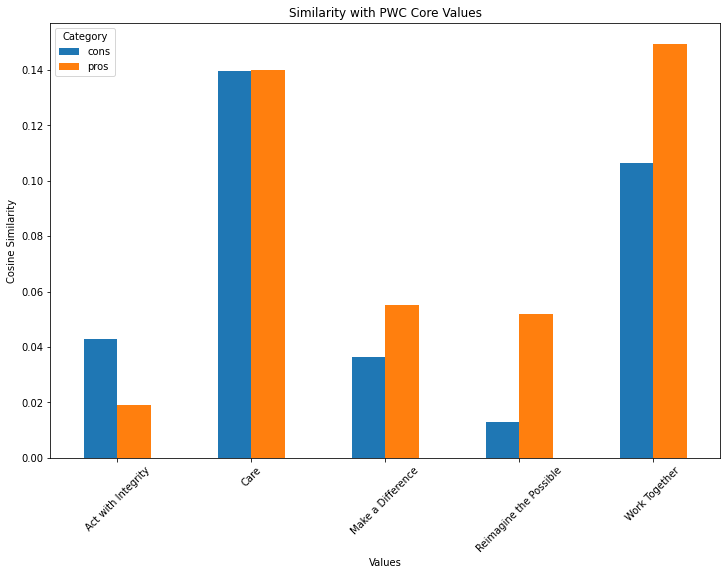

In [ ]:
pwc_pros_df = pd.DataFrame(pro_sim_pwc, columns =['Cosine Similarity'])
pwc_pros_df['Category'] = 'pros'
pwc_pros_df['Values'] = ['Act with Integrity','Make a Difference', 'Care', 'Work Together', 'Reimagine the Possible']
pwc_cons_df = pd.DataFrame(con_sim_pwc, columns =['Cosine Similarity'])
pwc_cons_df['Category'] = 'cons'
pwc_cons_df['Values'] = ['Act with Integrity','Make a Difference', 'Care', 'Work Together', 'Reimagine the Possible']
pwc_result = pd.concat([pwc_pros_df,pwc_cons_df])
pwc_table = pwc_result.pivot(index='Values', columns='Category', values='Cosine Similarity')
pwc_table.plot(kind='bar',figsize=(12,8))
plt.title("Similarity with PWC Core Values")
plt.ylabel("Cosine Similarity")
plt.xticks(rotation = 45)
plt.savefig('PWC_Similarity.png', bbox_inches='tight') 

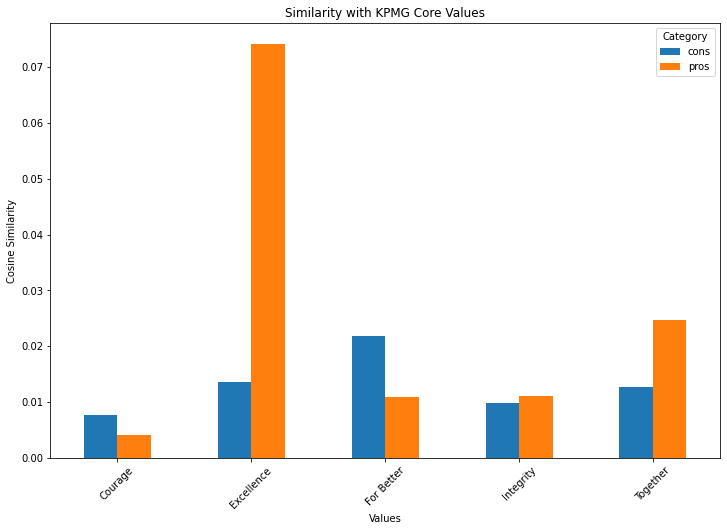

In [ ]:
kpmg_pros_df = pd.DataFrame(pro_sim_kpmg, columns =['Cosine Similarity'])
kpmg_pros_df['Category'] = 'pros'
kpmg_pros_df['Values'] = ['Integrity','Excellence', 'Courage', 'Together', 'For Better']
kpmg_cons_df = pd.DataFrame(con_sim_kpmg, columns =['Cosine Similarity'])
kpmg_cons_df['Category'] = 'cons'
kpmg_cons_df['Values'] = ['Integrity','Excellence', 'Courage', 'Together', 'For Better']
kpmg_result = pd.concat([kpmg_pros_df,kpmg_cons_df])
kpmg_table = kpmg_result.pivot(index='Values', columns='Category', values='Cosine Similarity')
kpmg_table.plot(kind='bar',figsize=(12,8))
plt.title("Similarity with KPMG Core Values")
plt.ylabel("Cosine Similarity")
plt.xticks(rotation = 45)
plt.savefig('KPMG_Similarity.png', bbox_inches='tight') 

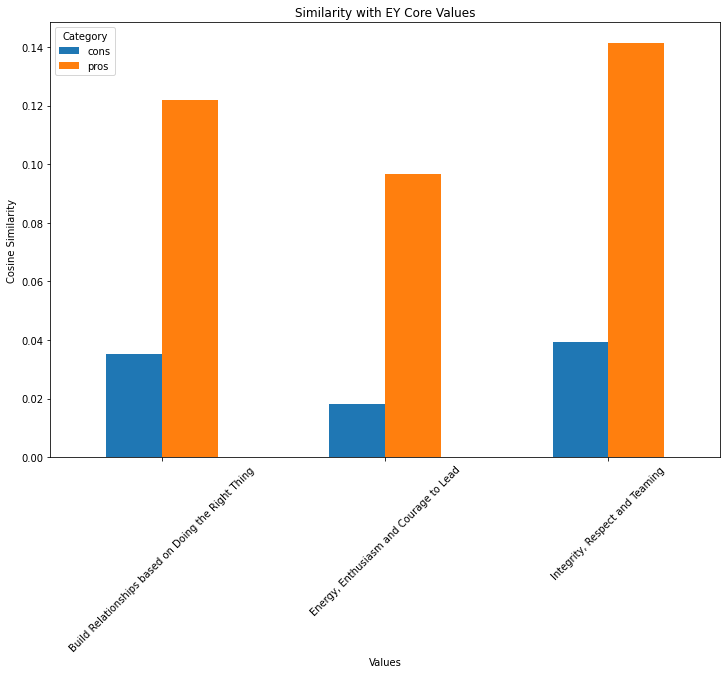

In [ ]:
ey_pros_df = pd.DataFrame(pro_sim_ey, columns =['Cosine Similarity'])
ey_pros_df['Category'] = 'pros'
ey_pros_df['Values'] = ['Integrity, Respect and Teaming','Energy, Enthusiasm and Courage to Lead', 'Build Relationships based on Doing the Right Thing']
ey_cons_df = pd.DataFrame(con_sim_ey, columns =['Cosine Similarity'])
ey_cons_df['Category'] = 'cons'
ey_cons_df['Values'] = ['Integrity, Respect and Teaming','Energy, Enthusiasm and Courage to Lead', 'Build Relationships based on Doing the Right Thing']
ey_result = pd.concat([ey_pros_df,ey_cons_df])
ey_table = ey_result.pivot(index='Values', columns='Category', values='Cosine Similarity')
ey_table.plot(kind='bar',figsize=(12,8))
plt.title("Similarity with EY Core Values")
plt.ylabel("Cosine Similarity")
plt.xticks(rotation = 45)
plt.savefig('EY_Similarity.png', bbox_inches='tight') 

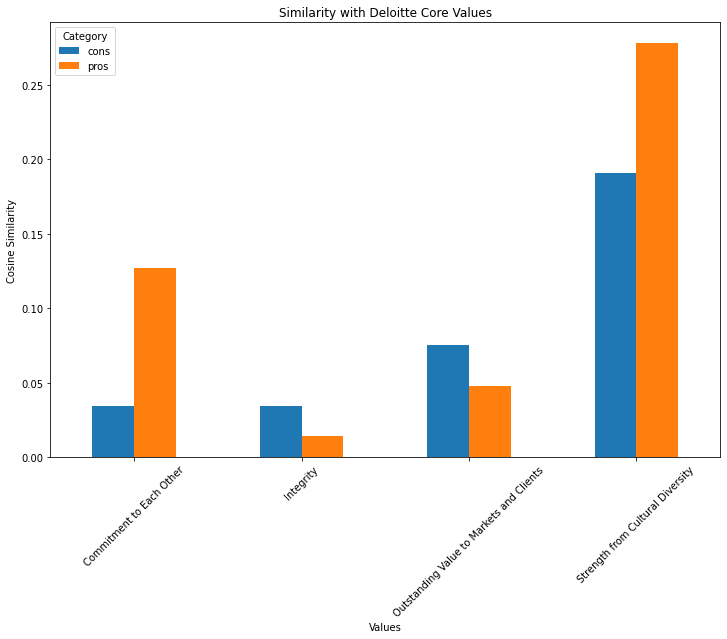

In [ ]:
deloitte_pros_df = pd.DataFrame(pro_sim_deloitte, columns =['Cosine Similarity'])
deloitte_pros_df['Category'] = 'pros'
deloitte_pros_df['Values'] = ['Integrity','Outstanding Value to Markets and Clients', 'Commitment to Each Other', 'Strength from Cultural Diversity']
deloitte_cons_df = pd.DataFrame(con_sim_deloitte, columns =['Cosine Similarity'])
deloitte_cons_df['Category'] = 'cons'
deloitte_cons_df['Values'] = ['Integrity','Outstanding Value to Markets and Clients', 'Commitment to Each Other', 'Strength from Cultural Diversity']
deloitte_result = pd.concat([deloitte_pros_df,deloitte_cons_df])
deloitte_table = deloitte_result.pivot(index='Values', columns='Category', values='Cosine Similarity')
deloitte_table.plot(kind='bar',figsize=(12,8))
plt.title("Similarity with Deloitte Core Values")
plt.ylabel("Cosine Similarity")
plt.xticks(rotation = 45)
plt.savefig('Deloitte_Similarity.png', bbox_inches='tight') 

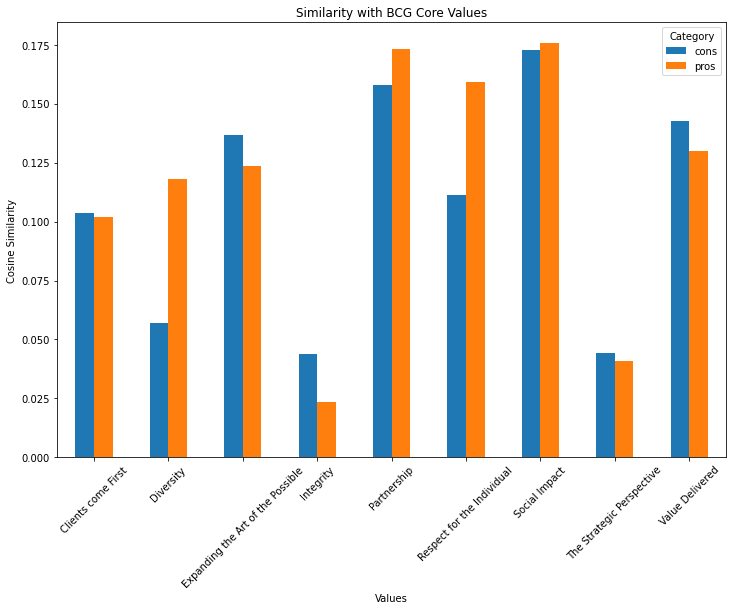

In [ ]:
bcg_pros_df = pd.DataFrame(pro_sim_bcg, columns =['Cosine Similarity'])
bcg_pros_df['Category'] = 'pros'
bcg_pros_df['Values'] = ['Integrity','Respect for the Individual', 'Diversity', 'Clients come First','The Strategic Perspective','Value Delivered','Partnership','Expanding the Art of the Possible','Social Impact']
bcg_cons_df = pd.DataFrame(con_sim_bcg, columns =['Cosine Similarity'])
bcg_cons_df['Category'] = 'cons'
bcg_cons_df['Values'] = ['Integrity','Respect for the Individual', 'Diversity', 'Clients come First','The Strategic Perspective','Value Delivered','Partnership','Expanding the Art of the Possible','Social Impact']
bcg_result = pd.concat([bcg_pros_df,bcg_cons_df])
bcg_table = bcg_result.pivot(index='Values', columns='Category', values='Cosine Similarity')
bcg_table.plot(kind='bar',figsize=(12,8))
plt.title("Similarity with BCG Core Values")
plt.ylabel("Cosine Similarity")
plt.xticks(rotation = 45)
plt.savefig('BCG_Similarity.png', bbox_inches='tight') 

# Sentiment

In [ ]:
fig_size = plt.rcParams["figure.figsize"]

#Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
from datetime import datetime
import copy

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
analyser = SentimentIntensityAnalyzer()

def get_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)
    return(snt['compound'])

def get_pos_neg(sentence):
    snt = analyser.polarity_scores(sentence)
    if(snt['pos'] > snt['neg']):
        return('pos')
    return('neg')

def sentiment_analysis(dfx):
    df = copy.deepcopy(dfx)
    df.columns = ['title', 'date_written', 'rating', 'current_former', 'job_title',
       'location', 'recommendation', 'outlook', 'main_text', 'pros', 'cons']

    df.pros = df.pros.astype(str)
    df.cons = df.cons.astype(str)
    
    df['pc'] = df.pros + ' ' + df.cons
    
    df['sent_score'] = df.pc.map(get_sentiment_scores)
    df['pos_neg'] = df.pc.map(get_pos_neg)
    
    df['date'] = pd.to_datetime(df['date_written'],errors = 'coerce')
    df.set_index('date', inplace=True)
    df2 = df[['sent_score']].resample("M").mean()
    y_mean = np.repeat(df['sent_score'].mean() ,df2.shape[0])
    plot(df2.index,y_mean,label='Mean', linestyle='--',color = 'k')
    plot(df2.index,df2['sent_score'])
    
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):

        print("Average sentiment score:",df['sent_score'].mean())

        print(df.groupby('current_former')[['sent_score']].mean())
        print(df.groupby('outlook')[['sent_score']].mean())
        print(df.groupby('recommendation')[['sent_score']].mean())

        print(df.job_title.value_counts()[:20])
        top_designations = df.job_title.value_counts().index[:20]
        print(df[df.job_title.isin(top_designations)].groupby('job_title')['sent_score'].mean().nlargest(20))

        print(df.location.value_counts()[:10])
        top_locations = df.location.value_counts().index[:10]
        print(df[df.location.isin(top_locations)].groupby('location')['sent_score'].mean().nlargest(10))
        print(df[df.location.isin(top_locations) & df.job_title.isin(top_designations)].pivot_table(index='location', columns='job_title', values='sent_score',aggfunc='mean'))
        #print(df[df.location.isin(top_locations) & df.job_title.isin(top_designations) ].groupby(['location','job_title'])[['sent_score']].mean())

Average sentiment score: 0.5036917085427142
                sent_score
current_former            
Current           0.514582
Former            0.474375
                  sent_score
outlook                     
Business Outlook    0.503692
                sent_score
recommendation            
Recommend         0.503692
 Senior Associate               240
 Associate                      182
 Anonymous Employee             121
 Manager                        111
 Assurance Associate            101
 Director                        73
 Tax Associate                   66
 Senior Manager                  65
 Audit Associate                 38
 Consultant                      31
 Audit Senior Associate          28
 Experienced Associate           25
 Senior Consultant               23
 Experienced Audit Associate     22
 Tax Manager                     22
 Auditor                         18
 Senior Tax Associate            17
 Tax Senior Associate            15
 Senior Associate               

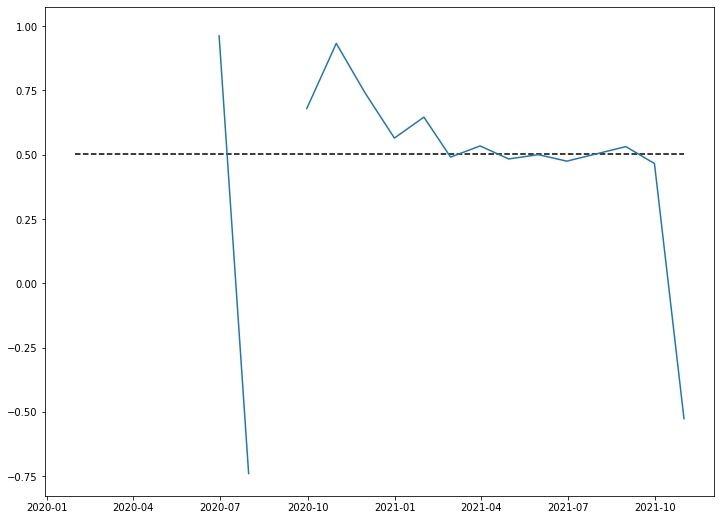

In [ ]:
sentiment_analysis(df_pwc)

Average sentiment score: 0.5311603678929758
                sent_score
current_former            
Current           0.540789
Former            0.514310
                  sent_score
outlook                     
Business Outlook    0.532943
                sent_score
recommendation            
Recommend         0.532943
 Senior Associate             347
 Audit Associate              254
 Associate                    216
 Manager                      165
 Audit Senior Associate       114
 Tax Associate                 99
 Director                      96
 Anonymous Employee            75
 Advisory Associate            71
 Senior Audit Associate        65
 Senior Manager                47
 Senior Associate              46
 Tax Senior Associate          42
 Tax Manager                   35
 Audit Manager                 31
 Advisory Senior Associate     30
 Auditor                       28
 Senior Consultant             26
 Executive Assistant           24
 Accountant                    23


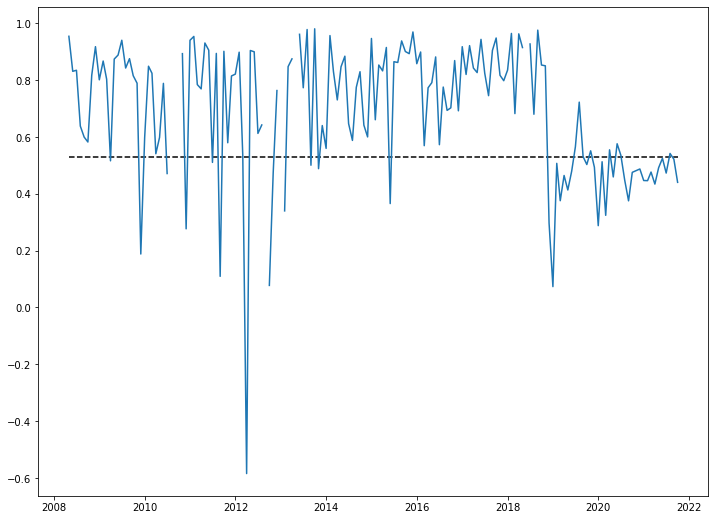

In [ ]:
sentiment_analysis(df_kpmg)

Average sentiment score: 0.48675098039215686
                sent_score
current_former            
Current           0.501172
Former            0.439367
                  sent_score
outlook                     
Business Outlook    0.486751
                sent_score
recommendation            
Recommend         0.486751
 Senior Consultant        193
 Manager                  112
 Senior Manager            73
 Senior Associate          70
 Consultant                55
 Staff Accountant          43
 Audit Associate           39
 Senior Auditor            37
 Assurance Senior          31
 Anonymous Employee        30
 Assurance Staff           30
 Auditor                   28
 Assurance Associate       28
 Tax Senior                25
 Analyst                   24
 Staff Auditor             23
 Business Consultant       23
 Associate Director        22
 Executive Assistant       21
 Technology Consultant     21
Name: job_title, dtype: int64
job_title
 Associate Director       0.720936
 Con

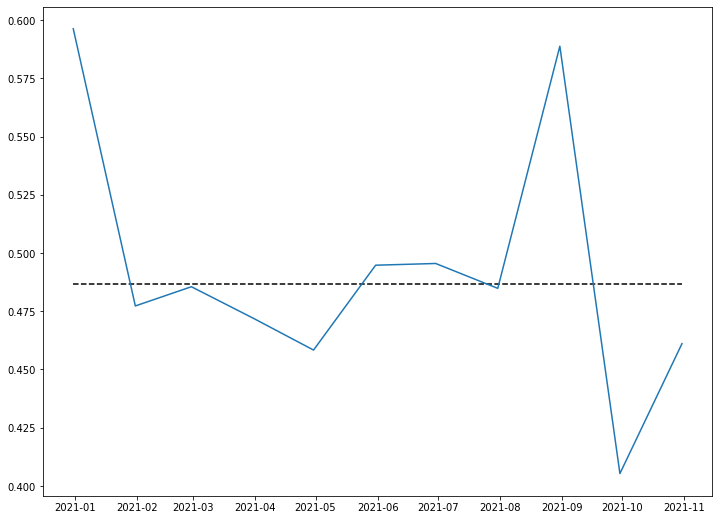

In [ ]:
sentiment_analysis(df_ey)

Average sentiment score: 0.5386730120481911
                sent_score
current_former            
Current           0.547375
Former            0.507101
                  sent_score
outlook                     
Business Outlook    0.538673
                sent_score
recommendation            
Recommend         0.538673
 Consultant                     300
 Senior Consultant              264
 Manager                        158
 Analyst                         86
 Senior Manager                  78
 Business Analyst                70
 Audit Senior                    61
 Anonymous Employee              32
 Tax Manager                     30
 Audit Assistant                 28
 Audit Associate                 27
 Business Technology Analyst     26
 Tax Consultant                  26
 Solution Analyst                24
 Senior Tax Consultant           23
 Executive Coordinator           23
 Audit Manager                   23
 Tax Consultant II               22
 Senior Solution Specialist     

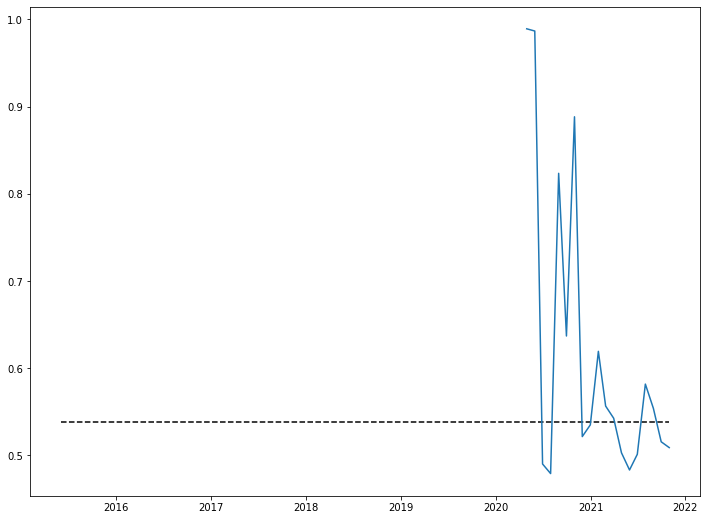

In [ ]:
sentiment_analysis(df_deloitte)

Average sentiment score: 0.5934898662207352
                sent_score
current_former            
Current           0.598501
Former            0.583811
                  sent_score
outlook                     
Business Outlook     0.59349
                sent_score
recommendation            
Recommend          0.59349
 Consultant                  563
 Anonymous Employee          554
 Associate                   315
 Project Leader              208
 Principal                   109
 Senior Associate             84
 Analyst                      37
 Executive Assistant          32
 Associate Consultant         31
 Administrative Assistant     28
 Data Scientist               27
 Business Analyst             26
 Partner                      24
 Senior Analyst               22
 Manager                      22
 Senior Consultant            21
 Senior Knowledge Analyst     20
 Research Associate           20
 Research Analyst             18
 Intern                       14
Name: job_title, dty

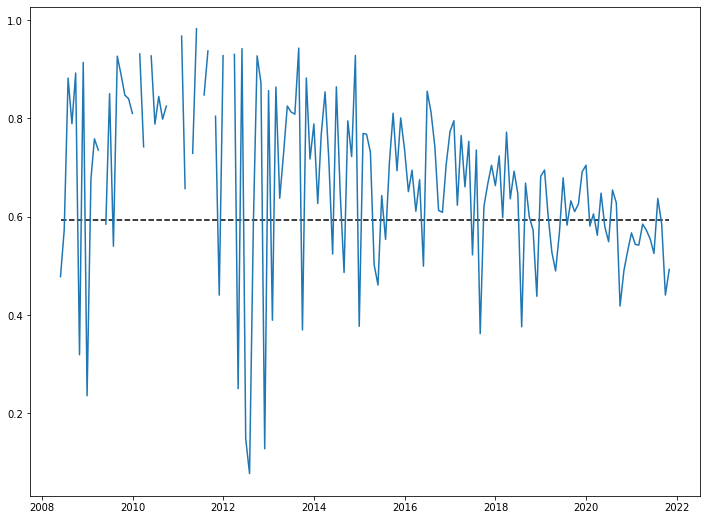

In [ ]:
sentiment_analysis(df_bcg)